Notebook for quick dataset-related hypothesis testing 

In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import torch

import sys
sys.path.append('/Users/ivan_zorin/Documents/DEV/code/ntl/')
from data.data import get_dataset, SGCCDataset
from transforms import GaussianNoise

In [5]:
datapath = '/Users/ivan_zorin/Documents/DEV/data/sgcc/data.csv'
dataset = get_dataset(datapath)
data = dataset.copy().drop('FLAG', axis=1)

(31738, 1034)


<Axes: ylabel='Count'>

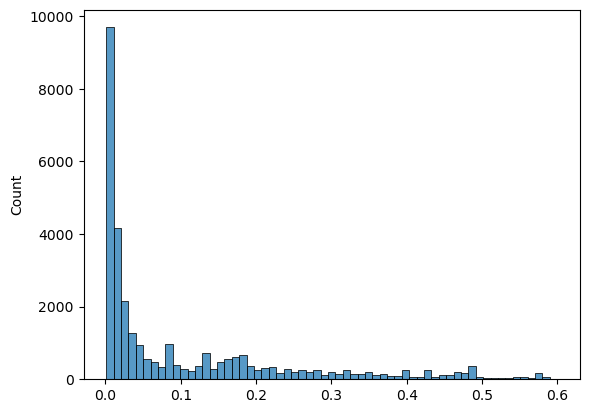

In [14]:
days = data.shape[1]
nan_ratio = data.isna().sum(axis=1) / days
nan_ratio = nan_ratio[nan_ratio < 0.6]
print(data.loc[nan_ratio.index.to_list()].shape)
sns.histplot(nan_ratio)

In [7]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
values = np.quantile(nan_ratio.to_numpy(), quantiles)
for quant, val in zip(quantiles, values):
    print(quant, ':', val)

0.05 : 0.0019342359767891683
0.25 : 0.008704061895551257
0.5 : 0.03288201160541586
0.75 : 0.17988394584139264
0.95 : 0.504835589941973


In [29]:
sgcc_dataset = SGCCDataset(datapath, nan_ratio=0.6, transforms=[GaussianNoise(3)])

In [30]:
sample = sgcc_dataset[1]

In [37]:
noiser = GaussianNoise(3)
x = np.zeros((100))
x_noisy = noiser((0, x, 1))

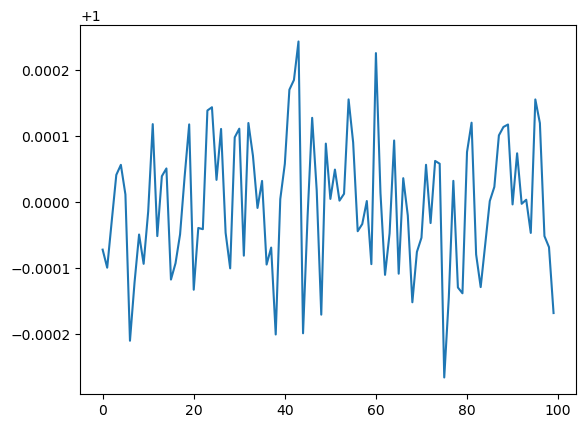

In [48]:
x = np.random.lognormal(0, 0.0001, 100)
plt.plot(x)